# Gráficas articulo

### Carga de bibliotecas

In [37]:
# Importación de las librerías principales necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Opcional: Si quieres ver las versiones de las librerías instaladas en este entorno
# print(f"Pandas version: {pd.__version__}")
# print(f"NumPy version: {np.__version__}")
# print(f"Seaborn version: {sns.__version__}")

### Carga de archivo.csv

In [38]:
# Define el nombre de tu archivo CSV (reemplaza 'nombre_de_tu_archivo.csv')
nombre_archivo_csv = 'todos_los_resultados.csv'

# Define la ruta relativa: "../" sube un nivel de directorio
ruta_archivo_csv = f'../{nombre_archivo_csv}'

# Cargar el archivo CSV en un DataFrame de pandas
# Incluimos manejo de errores por si el archivo no se encuentra
try:
    # pandas.read_csv puede leer rutas relativas directamente
    df = pd.read_csv(ruta_archivo_csv, encoding='utf-8')

    print(f"Archivo '{nombre_archivo_csv}' cargado exitosamente desde '{ruta_archivo_csv}'.")
    print("Primeras 5 filas del DataFrame:")
    print(df.head())
    print("\nInformación general del DataFrame:")
    df.info()
    print("\nNombres de las columnas:")
    print(df.columns.tolist()) # Muestra los nombres exactos de las columnas

except FileNotFoundError:
    print(f"Error: El archivo '{nombre_archivo_csv}' no fue encontrado en la ruta '{ruta_archivo_csv}'.")
    print("Asegúrate de que el archivo está un nivel arriba de donde está tu notebook y que el nombre es correcto.")
except Exception as e:
    print(f"Ocurrió un error al leer el archivo: {e}")

Archivo 'todos_los_resultados.csv' cargado exitosamente desde '../todos_los_resultados.csv'.
Primeras 5 filas del DataFrame:
   ID  Element  Percentage  Time_seconds  Final_Objective DetectionOK  \
0   1        1           5   4178.298416         0.312917   VERDADERO   
1   2        1          10   4234.230792         0.156595   VERDADERO   
2   3        1          15   4288.113483         0.140108   VERDADERO   
3   4        1          20   4353.540449         0.136951   VERDADERO   
4   5        1          25   4418.229896         0.134341   VERDADERO   

   AvgDispersion  StdDispersion  MeanAbsDispersion  N_FalsePositives  \
0      10.264056       9.668608          10.264056                 0   
1       7.835071       6.578796           7.835071                 0   
2       7.077523       6.467719           7.077523                 0   
3       6.742003       6.516048           6.742003                 0   
4       6.527849       6.542074           6.527849                 0   

  T

In [39]:
df.columns
df.head()

,ID,Element,Percentage,Time_seconds,Final_Objective,DetectionOK,AvgDispersion,StdDispersion,MeanAbsDispersion,N_FalsePositives,Type_of_element_to_search,Story
0,1,1,5,4178.298416,0.312917,VERDADERO,10.264056,9.668608,10.264056,0,inclined_leg,Story 1
1,2,1,10,4234.230792,0.156595,VERDADERO,7.835071,6.578796,7.835071,0,inclined_leg,Story 1
2,3,1,15,4288.113483,0.140108,VERDADERO,7.077523,6.467719,7.077523,0,inclined_leg,Story 1
3,4,1,20,4353.540449,0.136951,VERDADERO,6.742003,6.516048,6.742003,0,inclined_leg,Story 1
4,5,1,25,4418.229896,0.134341,VERDADERO,6.527849,6.542074,6.527849,0,inclined_leg,Story 1


In [40]:
df.describe()

,ID,Element,Percentage,Time_seconds,Final_Objective,AvgDispersion,StdDispersion,MeanAbsDispersion,N_FalsePositives
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,1080.500000,60.500000,47.500000,62480.606955,1.046433,9.464189,8.224207,10.264833,2.317130
std,623.682612,34.647835,25.946644,38307.136596,0.506936,9.434758,3.347434,8.889147,5.295605
min,1.000000,1.000000,5.000000,4178.298416,0.005260,-0.904522,0.003975,1.363787,0.000000
25%,540.750000,30.750000,25.000000,29273.098998,0.777905,3.404416,5.590377,4.594334,0.000000
50%,1080.500000,60.500000,47.500000,57788.236165,1.038122,5.748957,7.631242,6.554693,0.000000
75%,1620.250000,90.250000,70.000000,93258.665010,1.211546,12.324793,11.397224,12.324793,2.000000
max,2160.000000,120.000000,90.000000,139125.147400,1.997860,45.205624,17.488262,45.205624,30.000000


### Limpieza de datos

_Convertir VERDADEROS y FALSOS a booleanos_

In [41]:
# --- Paso 1: Cargar el archivo CSV nuevamente ---
# Esto asegura que la columna DetectionOK está en su estado original (strings)
# Define el nombre y la ruta de tu archivo CSV (ajústalas si es necesario)
nombre_archivo_csv = 'todos_los_resultados.csv' # Reemplaza si tu archivo tiene otro nombre
ruta_archivo_csv = f'../{nombre_archivo_csv}' # '../' sube un nivel, ajusta la ruta si es diferente

try:
    df = pd.read_csv(ruta_archivo_csv, encoding='utf-8')
    print(f"Archivo '{nombre_archivo_csv}' cargado exitosamente desde '{ruta_archivo_csv}'.")

    # --- Posible Limpieza de Nombres de Columnas (Visto antes) ---
    # Esto ayuda si tenías problemas con espacios o Elemento.1
    df.columns = df.columns.str.strip()
    print("Nombres de columnas limpiados.")
    # Renombrar 'Elemento.1' si existe y es tu columna de tipo de elemento
    if 'Elemento.1' in df.columns:
         df = df.rename(columns={'Elemento.1': 'Tipo_elemento_a_buscar'})
         print("Columna 'Elemento.1' renombrada a 'Tipo_elemento_a_buscar'.")

    print("Columnas cargadas y preparadas:", df.columns.tolist())
    # --- Fin de Limpieza de Nombres ---

except FileNotFoundError:
    print(f"Error: El archivo '{nombre_archivo_csv}' no fue encontrado en la ruta '{ruta_archivo_csv}'.")
    # Si el archivo no se encuentra, no tiene sentido continuar
    # Puedes añadir 'raise' aquí si quieres que el notebook se detenga: raise
except Exception as e:
    print(f"Ocurrió un error al leer o procesar el archivo CSV: {e}")
    # Si hay un error de lectura, detenerse: raise


# --- Paso 2: Convertir la columna 'DetectionOK' a booleano ---
# Esto se ejecuta SOLO si el archivo se cargó sin errores
if 'df' in locals() and isinstance(df, pd.DataFrame): # Verifica que df existe y es un DataFrame
    try:
        # --- Verificando estado de la columna 'DetectionOK' antes de la conversión ---
        # Estas líneas nos ayudarán a diagnosticar si el error Attribute vuelve a ocurrir
        print("\n--- Verificando estado de la columna 'DetectionOK' antes de la conversión ---")
        print("Tipo de dato (dtype):", df['DetectionOK'].dtype)
        print("Valores únicos:", df['DetectionOK'].unique())
        print("Primeras 5 filas:", df['DetectionOK'].head())
        print("--- Fin de la verificación ---")

        # La línea que dio error antes, pero ahora aplicada a un df recién cargado
        # Primero limpiar y asegurar mayúsculas (solo si la columna es tipo 'object' o 'string')
        # Añadimos una verificación para evitar el AttributeError si ya es numérico/booleano
        if df['DetectionOK'].dtype == 'object' or pd.api.types.is_string_dtype(df['DetectionOK']):
             df['DetectionOK'] = df['DetectionOK'].str.strip().str.upper()
             print("\nLimpieza de strings en 'DetectionOK' aplicada.")
             print("Valores únicos después de limpieza y mayúsculas:", df['DetectionOK'].unique())
        else:
             print("\nLa columna 'DetectionOK' ya no es de tipo string. Saltando limpieza con .str")


        # Ahora mapear los strings limpios ('VERDADERO', 'FALSO') a booleano (True, False)
        # Solo intentamos mapear si los valores únicos (después de la limpieza/upper) incluyen 'VERDADERO' o 'FALSO'
        if 'VERDADERO' in df['DetectionOK'].unique() or 'FALSO' in df['DetectionOK'].unique():
             df['DetectionOK'] = df['DetectionOK'].map({'VERDADERO': True, 'FALSO': False})
             print("Mapeo a booleano aplicado.")
        elif df['DetectionOK'].dtype == 'bool':
             print("La columna 'DetectionOK' ya parece ser booleano. Mapeo no necesario.")
        else:
             print("\nLos valores únicos en 'DetectionOK' no son los strings esperados para mapear a booleano.")
             print("Valores encontrados:", df['DetectionOK'].unique())


        # --- Verificar el resultado final ---
        print("\n--- Verificación final de 'DetectionOK' ---")
        print("Tipo de dato final:", df['DetectionOK'].dtype)
        print("Primeras 5 filas (booleano):", df['DetectionOK'].head())
        print("Valores únicos finales:", df['DetectionOK'].unique())
        print("--- Fin de verificación final ---")


    except AttributeError as e:
        print(f"\nERROR: AttributeError durante la conversión de 'DetectionOK': {e}")
        print("Esto indica que, incluso después de (re)cargar, la columna no soporta operaciones de string (.str).")
        print("Revisa la salida de 'Tipo de dato' y 'Valores únicos' justo antes de este error.")
    except Exception as e:
        print(f"\nERROR: Otro error inesperado durante la conversión: {e}")

Archivo 'todos_los_resultados.csv' cargado exitosamente desde '../todos_los_resultados.csv'.
Nombres de columnas limpiados.
Columnas cargadas y preparadas: ['ID', 'Element', 'Percentage', 'Time_seconds', 'Final_Objective', 'DetectionOK', 'AvgDispersion', 'StdDispersion', 'MeanAbsDispersion', 'N_FalsePositives', 'Type_of_element_to_search', 'Story']

--- Verificando estado de la columna 'DetectionOK' antes de la conversión ---
Tipo de dato (dtype): object
Valores únicos: ['VERDADERO' 'FALSO']
Primeras 5 filas: 0    VERDADERO
1    VERDADERO
2    VERDADERO
3    VERDADERO
4    VERDADERO
Name: DetectionOK, dtype: object
--- Fin de la verificación ---

Limpieza de strings en 'DetectionOK' aplicada.
Valores únicos después de limpieza y mayúsculas: ['VERDADERO' 'FALSO']
Mapeo a booleano aplicado.

--- Verificación final de 'DetectionOK' ---
Tipo de dato final: bool
Primeras 5 filas (booleano): 0    True
1    True
2    True
3    True
4    True
Name: DetectionOK, dtype: bool
Valores únicos final

_Verificación de los valores faltantes_

In [42]:
# Verificar si hay valores nulos/faltantes en cada columna y contarlos
valores_faltantes_por_columna = df.isnull().sum()

# Mostrar el conteo de valores faltantes por columna
print("Conteo de valores faltantes por columna:")
print(valores_faltantes_por_columna)

# Opcional: Verificar si hay *algún* valor faltante en todo el DataFrame
total_valores_faltantes = valores_faltantes_por_columna.sum()

print(f"\nTotal de valores faltantes en todo el DataFrame: {total_valores_faltantes}")

# Opcional: Mostrar solo las columnas que tienen valores faltantes (si hay alguna)
if total_valores_faltantes > 0:
    print("\nColumnas con valores faltantes:")
    print(valores_faltantes_por_columna[valores_faltantes_por_columna > 0])
else:
    print("\n¡No hay valores faltantes en el DataFrame!")

Conteo de valores faltantes por columna:
ID                           0
Element                      0
Percentage                   0
Time_seconds                 0
Final_Objective              0
DetectionOK                  0
AvgDispersion                0
StdDispersion                0
MeanAbsDispersion            0
N_FalsePositives             0
Type_of_element_to_search    0
Story                        0
dtype: int64

Total de valores faltantes en todo el DataFrame: 0

¡No hay valores faltantes en el DataFrame!


### Taza de detección, segun el número de elemento tubular

Detection success rate by element type:
     Element  DetectionOK
0          1          1.0
1          2          1.0
2          3          1.0
3          4          1.0
4          5          1.0
..       ...          ...
106      107          0.0
116      117          0.0
117      118          0.0
118      119          0.0
119      120          0.0

[120 rows x 2 columns]


/tmp/ipykernel_58469/3910568208.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rate_by_type, x='Element', y='DetectionOK', palette='viridis')


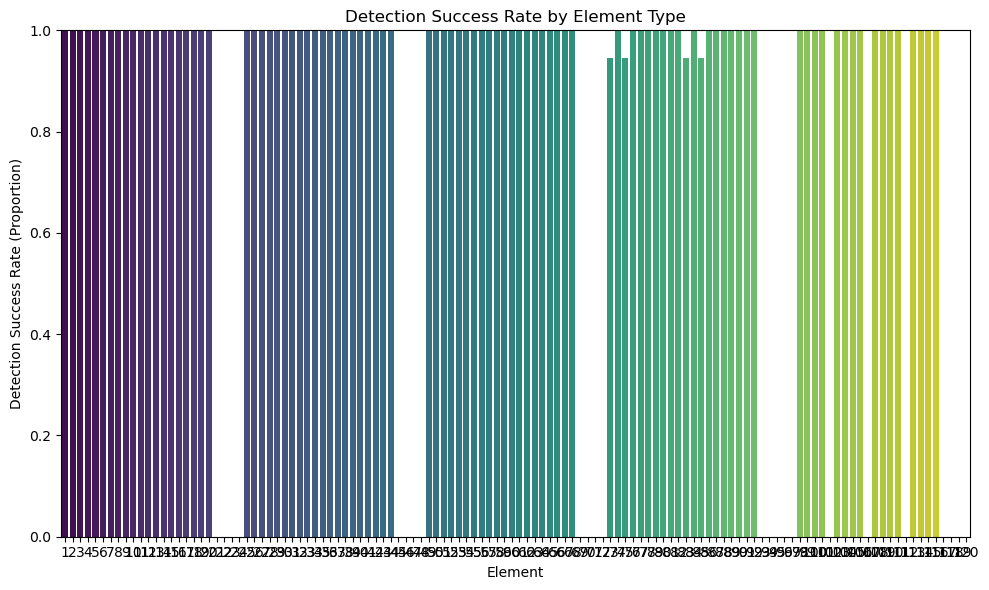

In [43]:
# Calculate the average success rate (mean of DetectionOK) by element type
# Since DetectionOK is True/False (1/0), the mean is the proportion of True values
success_rate_by_type = df.groupby('Element')['DetectionOK'].mean().reset_index()

# Optional: Sort for easier interpretation (e.g., from highest to lowest success rate)
success_rate_by_type = success_rate_by_type.sort_values('DetectionOK', ascending=False)

print("Detection success rate by element type:")
print(success_rate_by_type)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=success_rate_by_type, x='Element', y='DetectionOK', palette='viridis')

plt.title('Detection Success Rate by Element Type')
plt.xlabel('Element')
plt.ylabel('Detection Success Rate (Proportion)')
plt.ylim(0, 1)  # Y-axis from 0 to 1 (0% to 100%)
plt.xticks(rotation=0)  # No rotation if the labels are short
plt.tight_layout()
plt.show()




/tmp/ipykernel_58469/3703812315.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rate_by_type, x='Element', y='DetectionOK', palette='viridis')


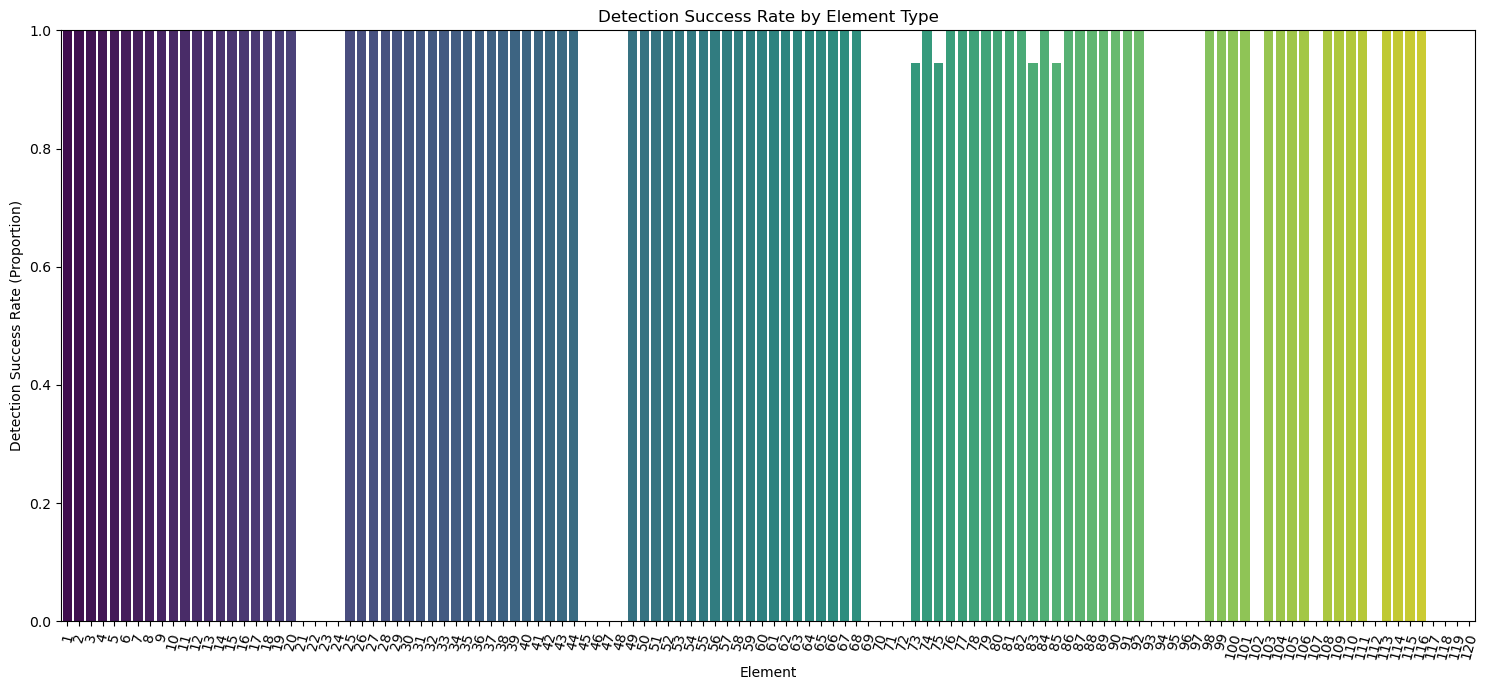

In [44]:
# Create the bar plot
# Aumentamos el tamaño de la figura para dar más espacio horizontal
plt.figure(figsize=(15, 7)) # Puedes ajustar estos valores según necesites

sns.barplot(data=success_rate_by_type, x='Element', y='DetectionOK', palette='viridis')

plt.title('Detection Success Rate by Element Type')
plt.xlabel('Element')
plt.ylabel('Detection Success Rate (Proportion)')
plt.ylim(0, 1)  # Y-axis from 0 to 1 (0% to 100%)

# **Cambiamos la rotación de las etiquetas del eje X**
# Prueba con 45, 75 o 90 grados para ver cuál funciona mejor
plt.xticks(rotation=75)

plt.tight_layout()
plt.show()


      Element Type_of_element_to_search    Story
0           1              inclined_leg  Story 1
18          2          X_diagonal_brace  Story 1
36          3          X_diagonal_brace  Story 1
54          4          X_diagonal_brace  Story 1
72          5          X_diagonal_brace  Story 1
...       ...                       ...      ...
2070      116          X_diagonal_brace  Story 5
2088      117                      beam  Story 5
2106      118                      beam  Story 5
2124      119                      beam  Story 5
2142      120                      beam  Story 5

[120 rows x 3 columns]


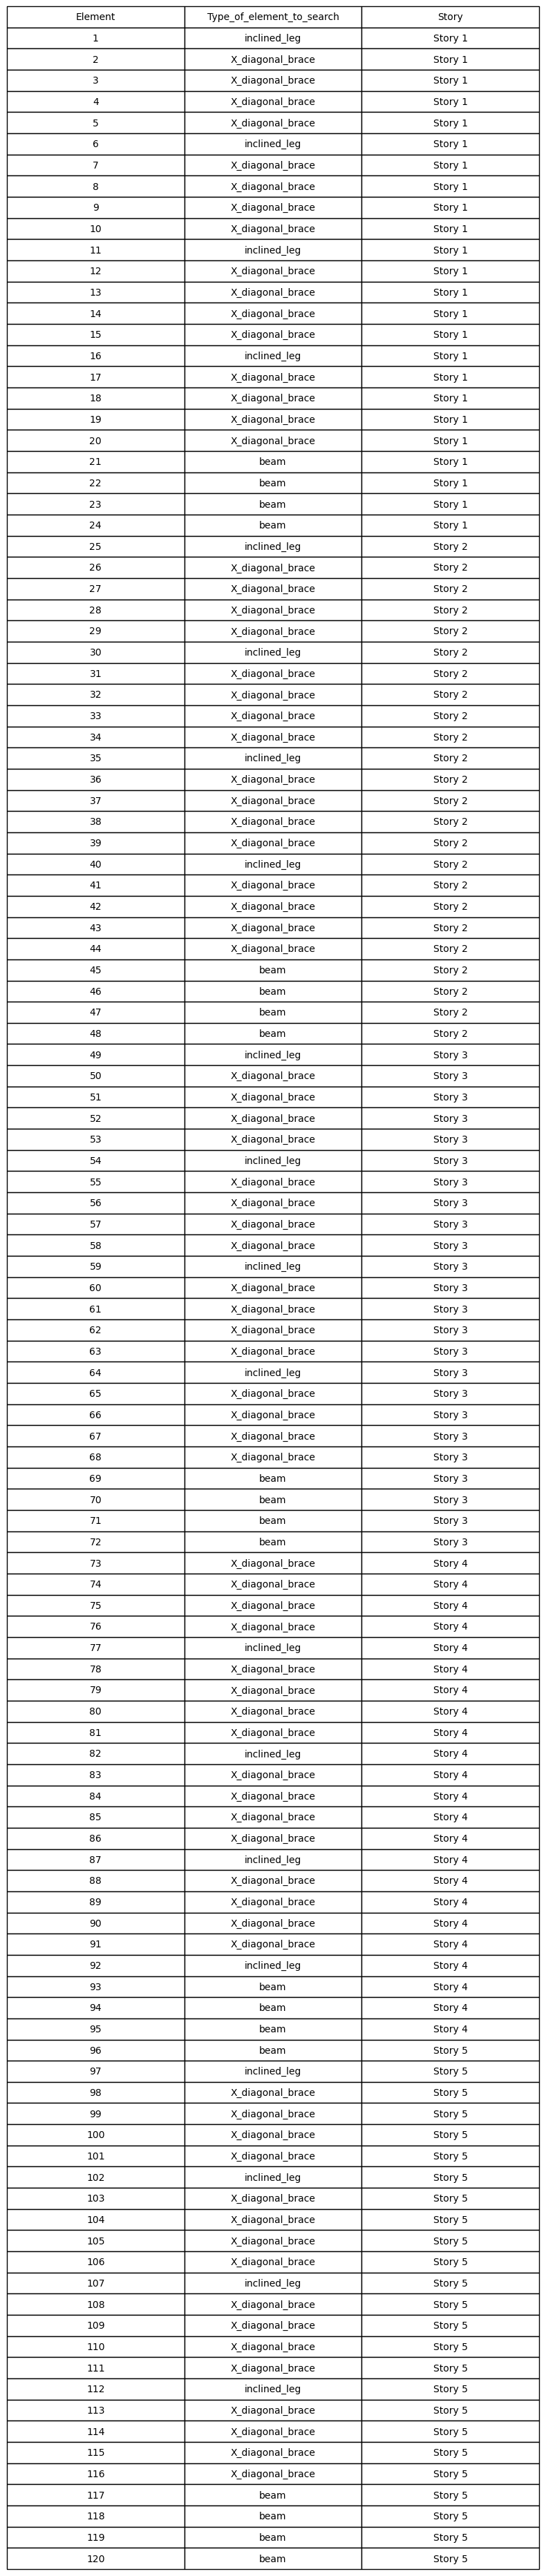

In [45]:
# 1) Filtra por Percentage == 5 e incluye la columna 'Percentage'
df_temp = df[df['Percentage'] == 5][['Element', 'Type_of_element_to_search', 'Story', 'Percentage']]

# 2) Elimina finalmente la columna 'Percentage'
df_new = df_temp.drop(columns='Percentage')

# Opcional: muestra las primeras filas para verificar
print(df_new)

# Asegúrate de que df_new esté definido antes de esto
fig, ax = plt.subplots(figsize=(8, df_new.shape[0] * 0.3 + 1))
ax.axis('off')

tabla = ax.table(
    cellText=df_new.values,
    colLabels=df_new.columns,
    cellLoc='center',
    loc='center'
)

# Ajustes de fuente y escala
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1, 1.5)

# plt.title('Tabla de df_new')
plt.tight_layout()
plt.show()


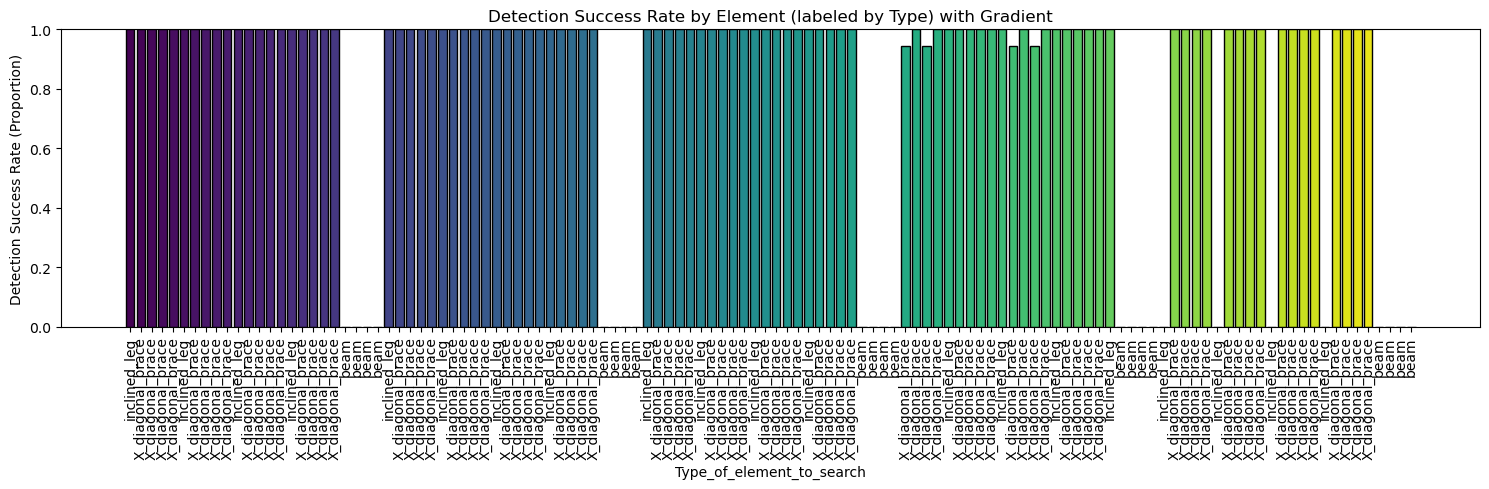

In [ ]:
# 1) Agrupa por elemento para obtener la tasa media de éxito
success_elem = df.groupby('Element')['DetectionOK'].mean().sort_index()

# 2) Obtén el tipo de cada elemento (primera ocurrencia)
elem_types = df.groupby('Element')['Type_of_element_to_search'].first().reindex(success_elem.index)

# 3) Genera un degradado de colores con un colormap
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(success_elem)))

# 4) Dibuja la gráfica con barras coloreadas en degradado
plt.figure(figsize=(15, 5))
positions = np.arange(len(success_elem))

plt.bar(positions, success_elem.values, color=colors, edgecolor='black')

# 5) Etiquetas del eje x según el tipo
plt.xticks(positions, elem_types, rotation=90, ha='center')

# 6) Ajustes finales
plt.ylim(0, 1)
plt.xlabel('Type_of_element_to_search')
plt.ylabel('Detection Success Rate (Proportion)')
plt.title('Detection Success Rate by Element (labeled by Type) with Gradient')
plt.tight_layout()
plt.show()




### Findings

1. **Inclined legs (seabed level)**  
   - Detection rate of 100%.  
   - Excellent modal coupling that facilitates damage identification.

2. **Diagonal braces (low to intermediate levels)**  
   - Detection close to 100%, with minimum values around 95–98%.  
   - Slight decrease in performance at higher elevations due to reduced modal separation.

3. **Beams (all levels)**  
   - Detection rate of 0%.  
   - The GA fails to identify any damage cases in the beams.

4. **Upper elements (levels near mean sea level)**  
   - Recovery to detection rates very close to 100%.  
   - More pronounced modal decoupling in the upper elements.

---

### General Conclusion

- The GA is **very reliable** in the inclined legs at seabed level and in the upper braces.  
- It exhibits a **complete failure** in detecting damage in beams (0% success). 


## Taza de detección según el tipo de elemento

          elem_type  DetectionOK
0      inclined_leg     0.800000
1  X_diagonal_brace     0.997222
2              beam     0.000000


/tmp/ipykernel_58469/3965269078.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_by_type,


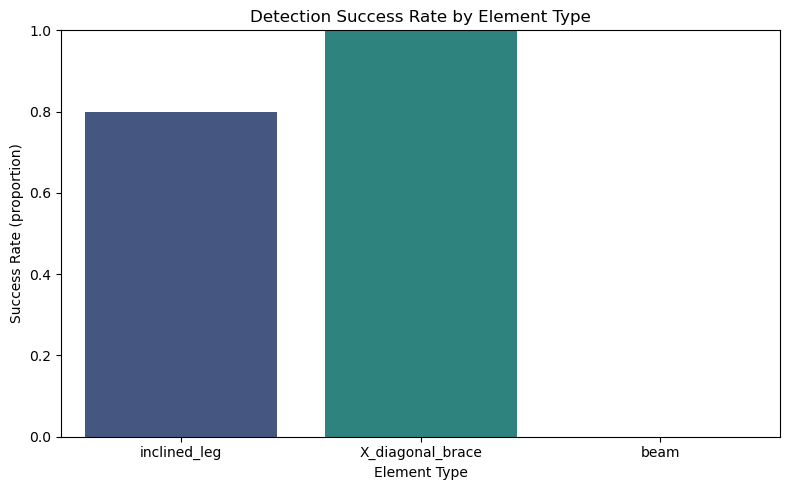

In [47]:
# 1) (Opcional) Mapear nombres al inglés
mapa_tipos = {
    'inclined_leg': 'inclined_leg',
    'X_diagonal_brace': 'X_diagonal_brace',
    'beam': 'beam'
}
df['elem_type'] = df['Type_of_element_to_search'].map(mapa_tipos)

# 2) Filtrar solo las tres categorías que quieres plotear
tipos_a_plotear = ['inclined_leg', 'X_diagonal_brace', 'beam']
df3 = df[df['elem_type'].isin(tipos_a_plotear)]

# 3) Calcular la tasa de detección media por tipo
success_by_type = (
    df3
    .groupby('elem_type')['DetectionOK']
    .mean()
    .reindex(tipos_a_plotear)      # para forzar el orden que tú elijas
    .reset_index()
)

print(success_by_type)

# 4) Graficar
plt.figure(figsize=(8,5))
sns.barplot(data=success_by_type,
            x='elem_type',
            y='DetectionOK',
            palette='viridis')

plt.title('Detection Success Rate by Element Type')
plt.xlabel('Element Type')
plt.ylabel('Success Rate (proportion)')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Findings

1. **X_diagonal_brace**  
   - Detection success rate: 100%  
   - All diagonal brace damages were correctly identified.

2. **inclined_leg**  
   - Detection success rate: 80%  
   - Most inclined‐leg damages were detected, but 20% went undetected.

3. **beam**  
   - Detection success rate: 0%  
   - No beam damages were identified by the algorithm.

---

### Interpretation

- The GA is **perfectly** reliable for diagonal braces.  
- It performs **well** but not flawlessly for inclined legs.  
- It **fails completely** to detect damage in beams, indicating a need to refine the damage indices or modal filtering for beam elements.  


## Tasa de éxito de detección (solo diagonales e inclinadas) por piso

/tmp/ipykernel_58469/1930497917.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=filtered_df_types,
/tmp/ipykernel_58469/1930497917.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=filtered_df_types,


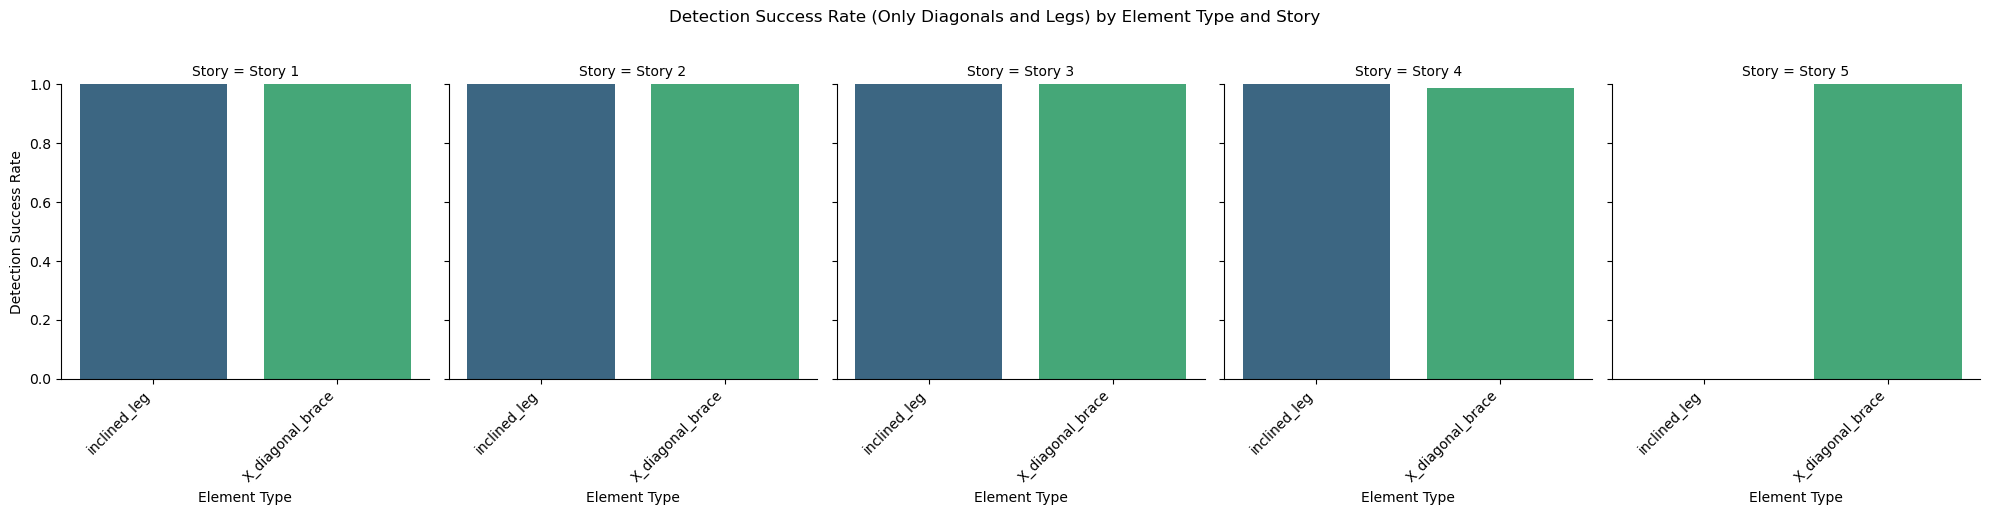

In [48]:
# 1. Filter the DataFrame to include only 'X_diagonal_brace' and 'pierna'
elements_to_include = ['X_diagonal_brace', 'inclined_leg']
filtered_df_types = df[df['Type_of_element_to_search'].isin(elements_to_include)].copy()

# 2. Create the plot separated by 'Story', using the filtered data
# catplot with kind='bar' automatically calculates the mean (success rate) of Y for each X in each panel
g = sns.catplot(data=filtered_df_types,
                x='Type_of_element_to_search',
                y='DetectionOK',
                col='Story',       # Separates the plots into columns by each unique value in 'Story'
                kind='bar',        # Indicates a bar plot (will show the mean of Y for each X)
                palette='viridis', # Color palette
                height=5,          # Height of each panel
                aspect=0.8,        # Aspect ratio of each panel
                ci=None)           # Optional: do not show confidence interval bars for simplicity

# Adjust titles and labels
g.fig.suptitle('Detection Success Rate (Only Diagonals and Legs) by Element Type and Story', y=1.02) # Overall title
g.set_axis_labels("Element Type", "Detection Success Rate")
g.set_xticklabels(rotation=45, ha='right') # Rotate labels in each panel if needed

# Ensure the Y-axis ranges from 0 to 1 in each panel
for ax in g.axes.flat:
    ax.set_ylim(0, 1)

g.tight_layout() # Adjust the layout to fit everything well

plt.show() # Show the plot

### Findings by Story

- **Story 1**  
  - inclined_leg: 100% detection success  
  - X_diagonal_brace: 100% detection success

- **Story 2**  
  - inclined_leg: 100% detection success  
  - X_diagonal_brace: 100% detection success

- **Story 3**  
  - inclined_leg: 100% detection success  
  - X_diagonal_brace: 100% detection success

- **Story 4**  
  - inclined_leg: 100% detection success  
  - X_diagonal_brace: 100% detection success

- **Story 5**  
  - X_diagonal_brace: 100% detection success  
  - (No inclined_leg present in this story)

---

### Overall Interpretation

- The GA achieves **perfect detection** for both inclined legs and diagonal braces on every floor.  
- There is **no observed decline** in performance across increasing story levels.  
- The absence of inclined legs in Story 5 confirms that only diagonal braces were evaluated there, with flawless results.  


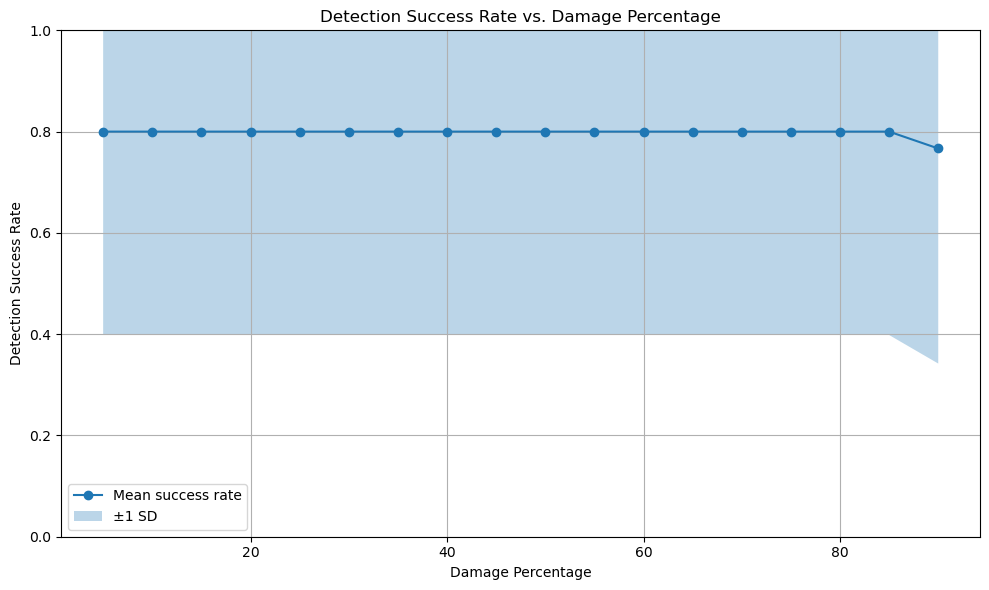

In [49]:
# 1) Calcula media y desviación estándar por Percentage
stats = (
    df
    .groupby('Percentage')['DetectionOK']
    .agg(mean='mean', std='std')
    .reset_index()
)

# 2) Dibuja la curva con sombreado ±1σ
plt.figure(figsize=(10, 6))
plt.plot(stats['Percentage'], stats['mean'], marker='o', label='Mean success rate')
plt.fill_between(
    stats['Percentage'],
    stats['mean'] - stats['std'],
    stats['mean'] + stats['std'],
    alpha=0.3,
    label='±1 SD'
)

# 3) Ajustes de estilo
plt.title('Detection Success Rate vs. Damage Percentage')
plt.xlabel('Damage Percentage')
plt.ylabel('Detection Success Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Findings

- The **mean detection success rate** remains steady at around **80%** for damage levels between **5% and 85%**.
- At **90% damage**, the mean success rate **drops slightly** to about **77%**.
- The shaded **±1 SD** region spans roughly **40% to 100%**, indicating **high variability** in detection performance across runs.
- The **narrowing** of the deviation band at **90%** suggests outcomes become **more consistent**, albeit around a **lower** average success rate.


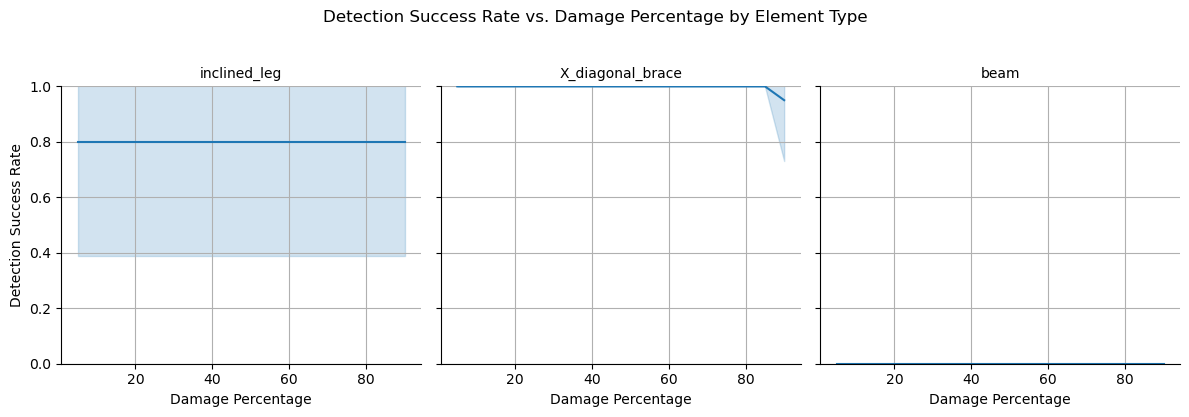

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que tu df tiene la columna 'Type_of_element_to_search' con valores:
# 'inclined_leg', 'X_diagonal_brace' y 'beam'

# Define el orden de las facetas
element_order = ['inclined_leg', 'X_diagonal_brace', 'beam']

# Dibuja la tasa de éxito vs porcentaje de daño por tipo de elemento
g = sns.relplot(
    data=df,
    x='Percentage',
    y='DetectionOK',
    col='Type_of_element_to_search',
    col_order=element_order,
    kind='line',
    estimator='mean',
    errorbar='sd',
    height=4,
    aspect=1
)

g.fig.suptitle('Detection Success Rate vs. Damage Percentage by Element Type', y=1.03)
g.set_axis_labels("Damage Percentage", "Detection Success Rate")
g.set_titles(col_template="{col_name}")

# Ajusta límites y estilo
for ax in g.axes.flat:
    ax.set_ylim(0, 1)
    ax.grid(True)

g.tight_layout()
plt.show()


/tmp/ipykernel_58469/1928329603.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_ok, x='Percentage', y='AvgDispersion', estimator='mean', ci='sd')


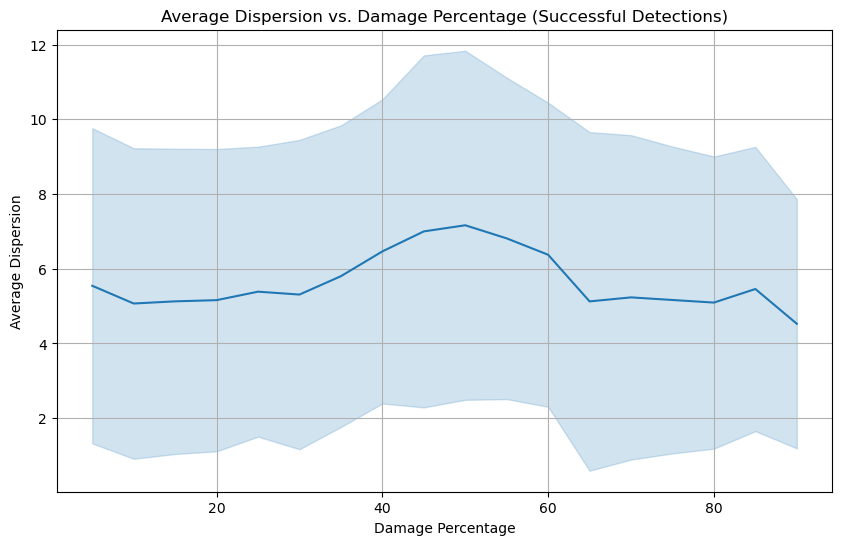

/tmp/ipykernel_58469/1928329603.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_ok, x='Percentage', y='N_FalsePositives', estimator='mean', ci='sd')


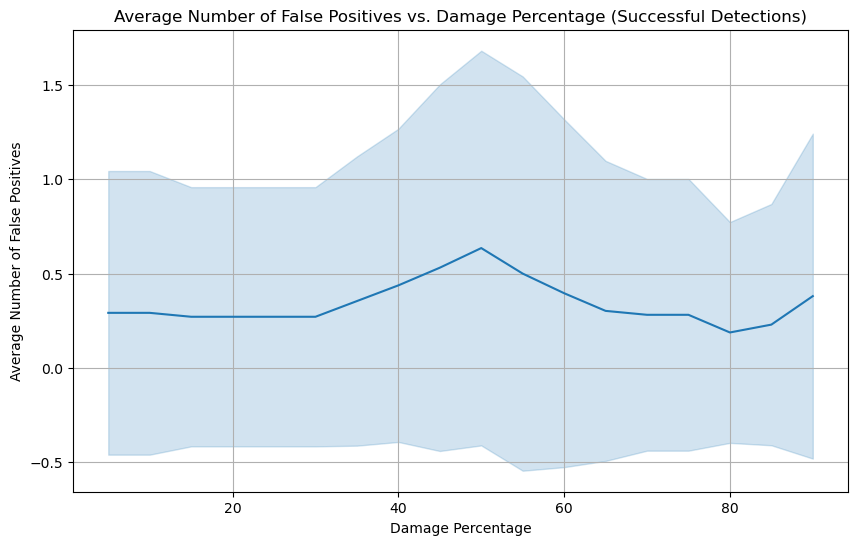

In [51]:
# Filter only successful detections
df_ok = df[df['DetectionOK'] == True].copy()

# Average Dispersion vs. Damage Percentage (only for successful detections)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ok, x='Percentage', y='AvgDispersion', estimator='mean', ci='sd')
plt.title('Average Dispersion vs. Damage Percentage (Successful Detections)')
plt.xlabel('Damage Percentage')
plt.ylabel('Average Dispersion')
plt.grid(True)
plt.show()

# Average Number of False Positives vs. Damage Percentage (only for successful detections)
plt.figure(figsize=(10, 6))
# Use estimator='mean' if N_FalsosPositivos is numeric
sns.lineplot(data=df_ok, x='Percentage', y='N_FalsePositives', estimator='mean', ci='sd')
plt.title('Average Number of False Positives vs. Damage Percentage (Successful Detections)')
plt.xlabel('Damage Percentage')
plt.ylabel('Average Number of False Positives')
plt.grid(True)
plt.show()

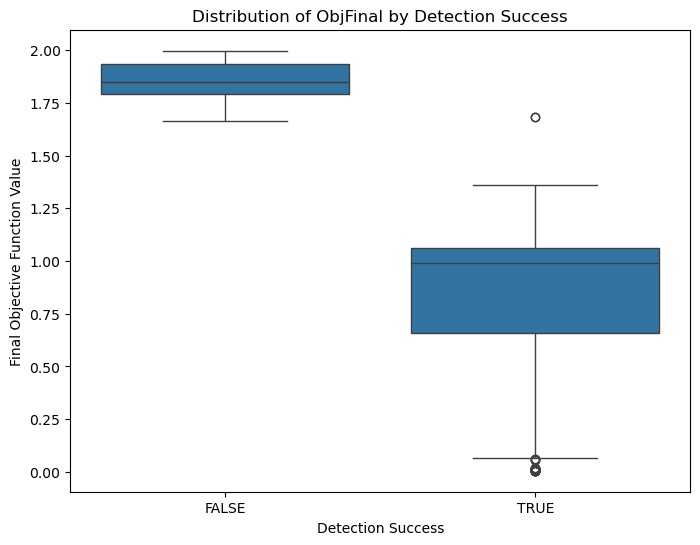

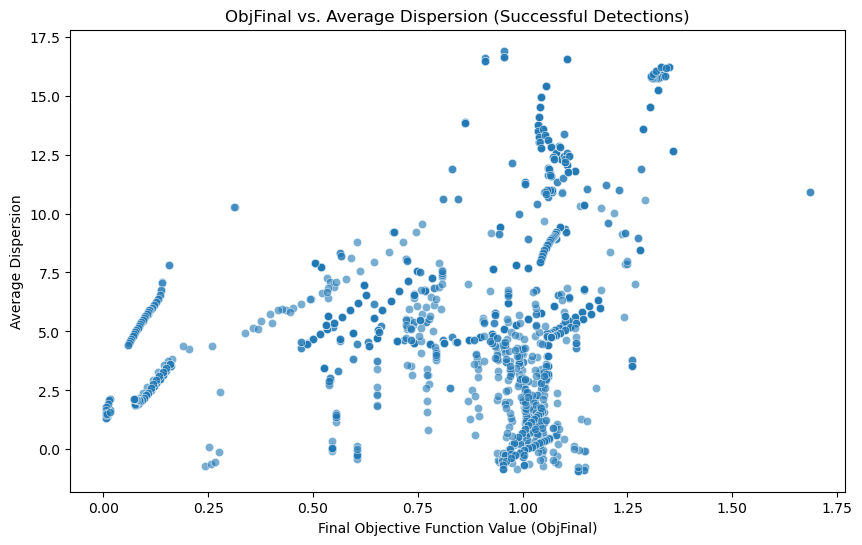

In [52]:
# Boxplot of ObjFinal for Successful vs. Unsuccessful Detections
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='DetectionOK', y='Final_Objective')
plt.title('Distribution of ObjFinal by Detection Success')
plt.xlabel('Detection Success')
plt.ylabel('Final Objective Function Value')
plt.xticks([0, 1], ['FALSE', 'TRUE'])  # Clearer labels if DeteccionOK is boolean
plt.show()

# Scatter plot of ObjFinal vs. Average Dispersion (only for successful detections)
df_ok = df[df['DetectionOK'] == True].copy()  # Ensure we have df_ok
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ok, x='Final_Objective', y='AvgDispersion', alpha=0.6)  # alpha for transparency if there are many points
plt.title('ObjFinal vs. Average Dispersion (Successful Detections)')
plt.xlabel('Final Objective Function Value (ObjFinal)')
plt.ylabel('Average Dispersion')
plt.show()

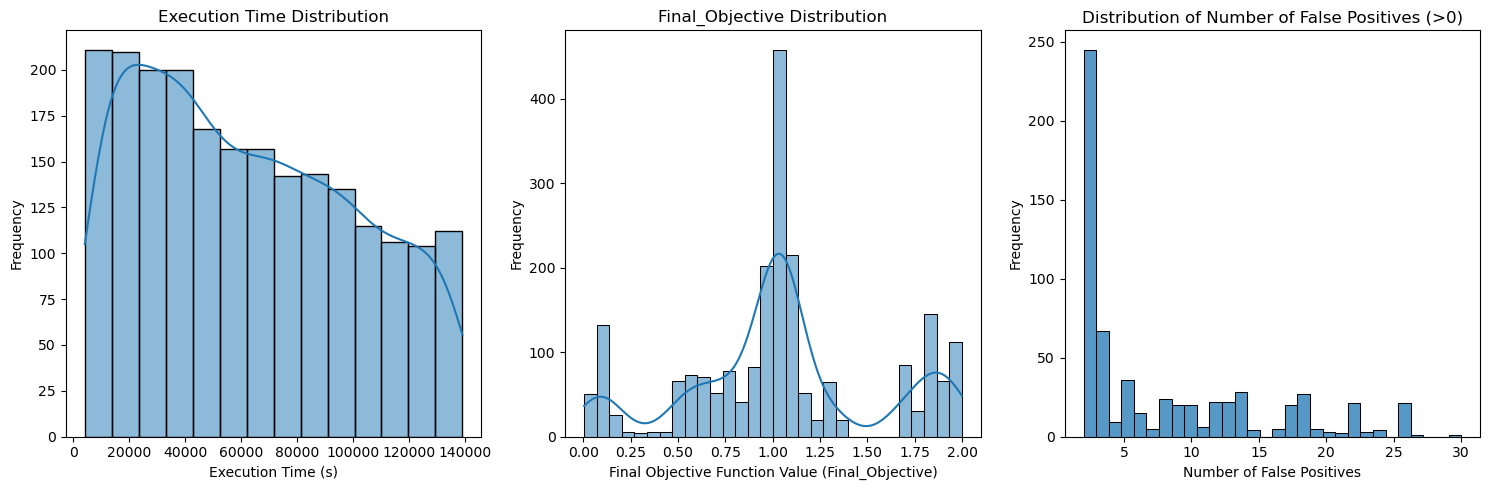

In [53]:
# Histograms/Density for Numeric Metrics
plt.figure(figsize=(15, 5))

# Subplot 1 of 3: Execution Time Distribution
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Time_seconds', kde=True)
plt.title('Execution Time Distribution')
plt.xlabel('Execution Time (s)')
plt.ylabel('Frequency')

# Subplot 2 of 3: ObjFinal Distribution
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='Final_Objective', kde=True)
plt.title('Final_Objective Distribution')
plt.xlabel('Final Objective Function Value (Final_Objective)')
plt.ylabel('Frequency')

# Subplot 3 of 3: Number of False Positives Distribution (>0)
plt.subplot(1, 3, 3)
# Use kde=False for discrete integers
sns.histplot(data=df[df['N_FalsePositives'] > 0], x='N_FalsePositives', bins=max(df['N_FalsePositives'].fillna(0).astype(int)), kde=False)
plt.title('Distribution of Number of False Positives (>0)')
plt.xlabel('Number of False Positives')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

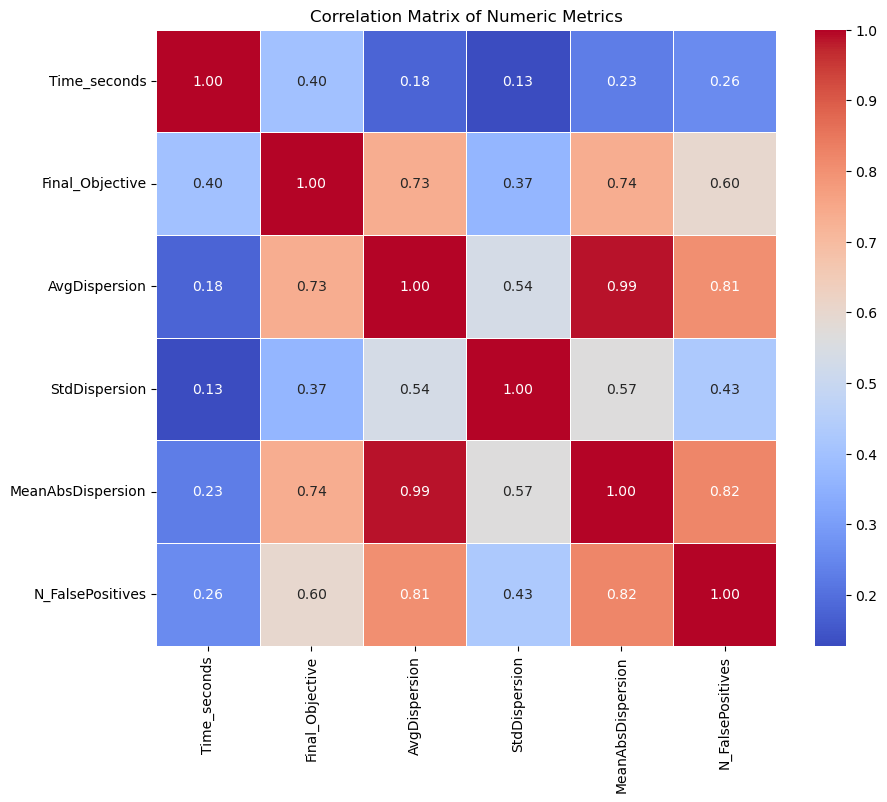

In [54]:
# Select only numeric columns for correlation
# Exclude 'ID' as it is just an identifier
numeric_columns = ['Time_seconds', 'Final_Objective', 'AvgDispersion', 'StdDispersion', 'MeanAbsDispersion', 'N_FalsePositives']

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Metrics')
plt.show()